In [3]:
import numpy as np
import pandas as pd
from ipywidgets import widgets, interactive
import seaborn as sns
import scipy
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

## Data Cleaning

In [4]:
atpmatches = pd.read_csv('Data/ATP.csv', encoding = "ISO-8859-1")
print(len(atpmatches.columns))
atpmatches.columns

50


Index(['matchid', 'tourney_id', 'tourney_name', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank',
       'winner_rank_points', 'loser_id', 'loser_seed', 'loser_entry',
       'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age',
       'loser_rank', 'loser_rank_points', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced'],
      dtype='object')

In [5]:
atpmatches["matchid"].tail()

0              1
1              2
2              3
3              4
4              5
5              6
6              7
7              8
8              9
9             10
10            11
11            12
12            13
13            14
14            15
15            16
16            17
17            18
18            19
19            20
20            21
21            22
22            23
23            24
24            25
25            26
26            27
27            28
28            29
29            30
           ...  
168927    168928
168928    168929
168929    168930
168930    168931
168931    168932
168932    168933
168933    168934
168934    168935
168935    168936
168936    168937
168937    168938
168938    168939
168939    168940
168940    168941
168941    168942
168942    168943
168943    168944
168944    168945
168945    168946
168946    168947
168947    168948
168948    168949
168949    168950
168950    168951
168951    168952
168952    168953
168953    168954
168954    1689

In [6]:
atp2019 = pd.read_csv('Data/ATP_2019.csv', encoding = "ISO-8859-1")
atp2020 = pd.read_csv('Data/ATP_2020.csv', encoding = "ISO-8859-1")
print(len(atp2020.columns))
atp2020.columns
#atpmatches.append(atp2020)
atp_19_20 = atp2019.append(atp2020)

49


In [7]:
atp_19_20["matchid"] = atp_19_20.index + 168957 + 1

In [10]:
atpmatches = atpmatches.append(atp_19_20)

/Users/tunggal/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [26]:
#atpmatches = pd.read_csv('Data/ATP.csv', encoding = "ISO-8859-1")
# change the format for John McEnroe's name
atpmatches.loc[atpmatches["winner_name"] == "John Mcenroe", "winner_name"] = "John McEnroe"
atpmatches.loc[atpmatches["loser_name"] == "John Mcenroe", "loser_name"] = "John McEnroe"
# factor in Stan Wawrinka's official name change
atpmatches.loc[atpmatches["winner_name"] == "Stanislas Wawrinka", "winner_name"] = "Stan Wawrinka"
atpmatches.loc[atpmatches["loser_name"] == "Stanislas Wawrinka", "loser_name"] = "Stan Wawrinka"
# change id and names to match for Chris Lewis
atpmatches.loc[atpmatches["winner_id"] == 103993.0, "winner_id"] = 100474.0
atpmatches.loc[atpmatches["loser_id"] == 103993.0, "loser_id"] = 100474.0
atpmatches.loc[atpmatches["winner_name"] == "Chris Lewis NZL", "winner_name"] = "Chris Lewis"
atpmatches.loc[atpmatches["loser_name"] == "Chris Lewis NZL", "loser_name"] = "Chris Lewis"
# change name for Jo-Wilfried Tsonga
atpmatches.loc[atpmatches["winner_name"] == "Jo Wilfried Tsonga", "winner_name"] = "Jo-Wilfried Tsonga"
atpmatches.loc[atpmatches["loser_name"] == "Jo Wilfried Tsonga", "loser_name"] = "Jo-Wilfried Tsonga"
# change name for MaliVai Washington
atpmatches.loc[atpmatches["winner_name"] == "Malivai Washington", "winner_name"] = "MaliVai Washington"
atpmatches.loc[atpmatches["loser_name"] == "Malivai Washington", "loser_name"] = "MaliVai Washington"
# change names for grand slams to be uniform
atpmatches.loc[atpmatches["tourney_name"] == "Us Open", "tourney_name"] = "US Open"
atpmatches.loc[atpmatches["tourney_name"] == "Australian Chps.", "tourney_name"] = "Australian Open"

In [12]:
atpmatches['tourney_date'] = atpmatches['tourney_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [13]:
atpmatches["year"] = atpmatches['tourney_date'].apply(lambda x: x.year)

In [14]:
atpmatches[((atpmatches["winner_name"] == "Andy Roddick") | (atpmatches["loser_name"] == "Andy Roddick")) & (atpmatches["tourney_level"] == "F")]["year"].unique()

array([2003, 2004, 2006, 2007, 2008, 2010])

In [15]:
atpmatches[(atpmatches["draw_size"] == 8) & (atpmatches["year"] > 1969)][["tourney_name", "year", "surface", "tourney_level"]].drop_duplicates()

,tourney_name,year,surface,tourney_level
5931,Dallas,1971,Carpet,A
7278,Dallas WCT,1972,Carpet,A
9791,Masters,1972,Carpet,M
11221,Dallas WCT,1973,Carpet,A
13603,Masters,1973,Carpet,M
14244,Dallas WCT,1974,Carpet,A
17479,Masters,1974,Grass,M
19859,Dallas WCT,1975,Carpet,A
21571,Masters,1975,Hard,M
24172,Dallas WCT,1976,Carpet,A


In [16]:
# change tourney type for 2017 YEC to "F"
atpmatches.loc[(atpmatches["year"] == 2017) & (atpmatches["tourney_name"] == "London") & (atpmatches["draw_size"] == 8), "tourney_level"] = "F"

In [17]:
atpmatches[(atpmatches["tourney_name"] == "Australian Open-2") & (atpmatches["round"] == "F") &
          (atpmatches["round"] == "F")][["winner_name", "tourney_date", "year"]]

,winner_name,tourney_date,year
29479,Vitas Gerulaitis,1977-12-19,1977


In [18]:
atpmatches.loc[atpmatches["tourney_name"] == "Australian Open-2", "tourney_name"] = "Australian Open"

In [19]:
atpmatches[(atpmatches["tourney_name"] == "Australian Open") & (atpmatches["round"] == "F")][["year", "winner_name"]]

,year,winner_name
60,1968,Bill Bowrey
1600,1969,Rod Laver
2729,1970,Arthur Ashe
4530,1971,Ken Rosewall
7277,1971,Ken Rosewall
10576,1972,John Newcombe
16683,1973,Jimmy Connors
17885,1974,John Newcombe
23532,1975,Mark Edmondson
28564,1977,Roscoe Tanner


In [20]:
atpmatches.loc[(atpmatches["tourney_name"] == "Australian Open") & (
    atpmatches["tourney_date"] == '1971-12-26'), "year"] = 1972

atpmatches.loc[(atpmatches["tourney_name"] == "Australian Open") & (
    atpmatches["tourney_date"] == '1972-12-26'), "year"] = 1973

atpmatches.loc[(atpmatches["tourney_name"] == "Australian Open") & (
    atpmatches["tourney_date"] == '1973-12-26'), "year"] = 1974

atpmatches.loc[(atpmatches["tourney_name"] == "Australian Open") & (
    atpmatches["tourney_date"] == '1974-12-21'), "year"] = 1975

atpmatches.loc[(atpmatches["tourney_name"] == "Australian Open") & (
    atpmatches["tourney_date"] == '1975-12-26'), "year"] = 1976

## Initial Look into the Data

Below we will look at Roger Federer's 20 grand slam finals wins and 11 grand slam finals losses

In [21]:
atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["round"] == "F") & (atpmatches["winner_name"] == "Roger Federer")][["tourney_name", "year", "winner_name", "loser_name", "loser_rank", "score"]]

,tourney_name,year,winner_name,loser_name,loser_rank,score
122352,Wimbledon,2003,Roger Federer,Mark Philippoussis,48.0,7-6(5) 6-2 7-6(3)
124819,US Open,2004,Roger Federer,Lleyton Hewitt,5.0,6-0 7-6(3) 6-0
125524,Australian Open,2004,Roger Federer,Marat Safin,86.0,7-6(3) 6-4 6-2
126214,Wimbledon,2004,Roger Federer,Andy Roddick,2.0,4-6 7-5 7-6(3) 6-4
128678,Wimbledon,2005,Roger Federer,Andy Roddick,4.0,6-2 7-6(2) 6-4
129748,US Open,2005,Roger Federer,Andre Agassi,7.0,6-3 2-6 7-6(1) 6-1
131176,Wimbledon,2006,Roger Federer,Rafael Nadal,2.0,6-0 7-6(5) 6-7(2) 6-3
132064,Australian Open,2006,Roger Federer,Marcos Baghdatis,54.0,5-7 7-5 6-0 6-2
132622,US Open,2006,Roger Federer,Andy Roddick,10.0,6-2 4-6 7-5 6-1
133588,US Open,2007,Roger Federer,Novak Djokovic,3.0,7-6(4) 7-6(2) 6-4


In [22]:
atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["round"] == "F") & (atpmatches["loser_name"] == "Roger Federer")][["tourney_name", "year", "winner_name", "loser_name", "winner_rank", "score"]]

,tourney_name,year,winner_name,loser_name,winner_rank,score
130238,Roland Garros,2006,Rafael Nadal,Roger Federer,2.0,1-6 6-1 6-4 7-6(4)
133839,Roland Garros,2007,Rafael Nadal,Roger Federer,2.0,6-3 4-6 6-3 6-4
137342,Wimbledon,2008,Rafael Nadal,Roger Federer,2.0,6-4 6-4 6-7(5) 6-7(8) 9-7
137944,Roland Garros,2008,Rafael Nadal,Roger Federer,2.0,6-1 6-3 6-0
140661,US Open,2009,Juan Martin Del Potro,Roger Federer,6.0,3-6 7-6(5) 4-6 7-6(4) 6-2
141671,Australian Open,2009,Rafael Nadal,Roger Federer,1.0,7-5 3-6 7-6(3) 3-6 6-2
147749,Roland Garros,2011,Rafael Nadal,Roger Federer,1.0,7-5 7-6(3) 5-7 6-1
156899,Wimbledon,2014,Novak Djokovic,Roger Federer,2.0,6-7(7) 6-4 7-6(4) 5-7 6-4
158120,Wimbledon,2015,Novak Djokovic,Roger Federer,1.0,7-6(1) 6-7(10) 6-4 6-3
158828,US Open,2015,Novak Djokovic,Roger Federer,1.0,6-4 5-7 6-4 6-4


In [23]:
atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["loser_name"] == "Roger Federer")][["tourney_name", "tourney_date", "winner_name", "loser_name", "winner_rank", "round", "score"]]

,tourney_name,tourney_date,winner_name,loser_name,winner_rank,round,score
109407,Wimbledon,1999-06-21,Jiri Novak,Roger Federer,59.0,R128,6-3 3-6 4-6 6-3 6-4
109696,Roland Garros,1999-05-24,Patrick Rafter,Roger Federer,3.0,R128,5-7 6-3 6-0 6-2
110655,US Open,2000-08-28,Juan Carlos Ferrero,Roger Federer,12.0,R32,7-5 7-6(6) 1-6 7-6(6)
111019,Australian Open,2000-01-17,Arnaud Clement,Roger Federer,54.0,R32,6-1 6-4 6-3
111661,Wimbledon,2000-06-26,Yevgeny Kafelnikov,Roger Federer,5.0,R128,7-5 7-5 7-6(6)
113350,Roland Garros,2000-05-29,Alex Corretja,Roger Federer,10.0,R16,7-5 7-6(7) 6-2
113918,Australian Open,2001-01-15,Arnaud Clement,Roger Federer,18.0,R32,7-6(5) 6-4 6-4
114396,US Open,2001-08-27,Andre Agassi,Roger Federer,2.0,R16,6-1 6-2 6-4
114815,Roland Garros,2001-05-28,Alex Corretja,Roger Federer,13.0,QF,7-5 6-4 7-5
116436,Wimbledon,2001-06-25,Tim Henman,Roger Federer,11.0,QF,7-5 7-6(6) 2-6 7-6(6)


In [28]:
atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["loser_name"] 
                                == "John Isner")].groupby(["winner_rank"]).agg({"winner_name": 'count'}).reset_index().head()

,winner_rank,winner_name
0,1.0,2
1,2.0,2
2,3.0,1
3,4.0,2
4,6.0,2


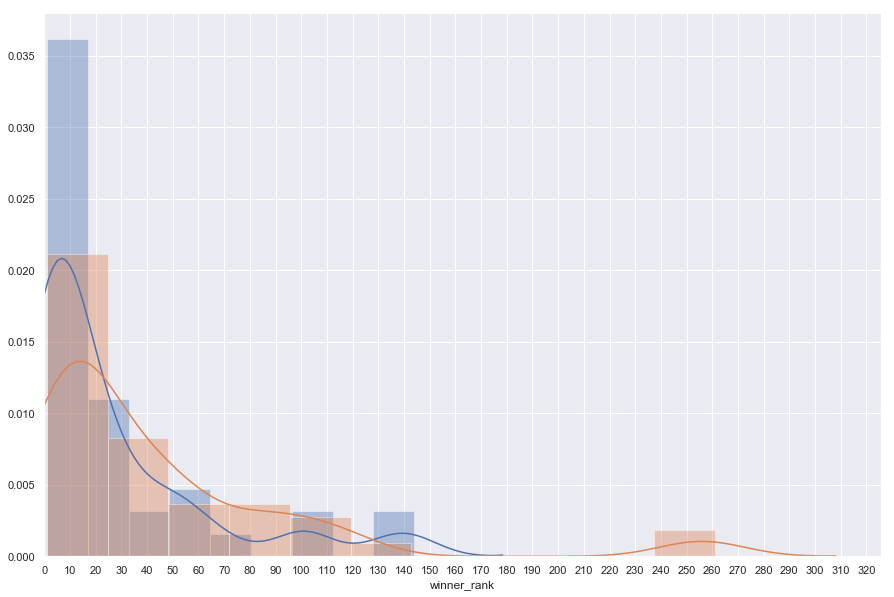

In [29]:
data = atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["loser_name"] == "Rafael Nadal")][["winner_rank"]]
data2 = atpmatches[(atpmatches["tourney_level"] == "G") & (atpmatches["loser_name"] == "John Isner")][["winner_rank"]]
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.distplot(data["winner_rank"])
ax2 = sns.distplot(data2["winner_rank"])
ax.set(xlim=(0))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
#be able to set bins to [1, 3, 5, 10, 20, 50, 100], 250, 1000]

## Saving Data as a .csv File

To make things easier for future analysis/visualizations, we will make a .csv file of our cleaned data:

In [27]:
atpmatches.to_csv("atpmatches_clean.csv", index = False)